# Task 1:Input data

In [65]:
import h5py
f = h5py.File('processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z', 'r')
treeArray = f['t_allpar_new'][()]

In [66]:
import pandas as pd
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_index']
labels_df = pd.DataFrame(treeArray, columns = labels)
labels_df


,j_q,j_g,j_w,j_z,j_t,j_index
0,0,1,0,0,0,101333
1,0,1,0,0,0,101333
2,0,1,0,0,0,101333
3,0,1,0,0,0,101333
4,0,1,0,0,0,101333
...,...,...,...,...,...,...
5131608,0,0,0,1,0,300123134
5131609,0,0,0,1,0,300123134
5131610,0,0,0,1,0,300123134
5131611,0,0,0,1,0,300123134


In [67]:
j_index=300003264.0
labels_df[labels_df['j_index']==j_index].drop_duplicates()
labels_vals=labels_df[labels_df['j_index'].duplicated() == False].drop('j_index',axis=1)
labels_vals

,j_q,j_g,j_w,j_z,j_t
0,0,1,0,0,0
51,1,0,0,0,0
101,0,0,0,1,0
142,1,0,0,0,0
161,0,0,1,0,0
...,...,...,...,...,...
5131388,0,0,0,1,0
5131417,0,0,1,0,0
5131447,0,0,0,0,1
5131486,0,0,0,1,0


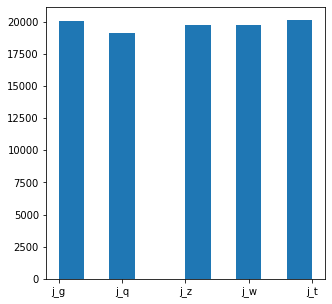

In [68]:
dat = []
for row in labels_vals.iterrows():
    for j in range(row[1].shape[0]):
        if row[1][j]==1:
            dat.append(labels[j])
plt.figure(figsize=(5,5))
plt.hist(dat)
plt.show()
plt.close()

# Task 2:High level features

In [69]:
import matplotlib.pyplot as plt
import numpy as np

In [70]:
features = ['j_mass_mmdt', 'j_pt', 'j_eta', 'j_zlogz', 'j_multiplicity', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 
      'j_d2_b1_mmdt','j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 
      'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 
      'j_n2_b1_mmdt', 'j_n2_b2_mmdt']
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_index']

In [33]:
def plot_1D(feature):
    
    features = [feature] + labels
    features_df = pd.DataFrame(treeArray,columns = features)
    val = features_df[features].values

    q = []
    g = []
    w = []
    z = []
    t = []

    for x in val:
        if x[1] == 1:
            q.append(x[0])
        if x[2] == 1:
            g.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            t.append(x[0])
    plt.hist(g,100,histtype='step',density = True, label = 'gluon',color = 'blue')
    plt.hist(q,100,histtype='step',density = True, label = 'quark',color = 'red')
    plt.hist(w,100,histtype='step',density = True, label = 'W',color = 'black')
    plt.hist(z,100,histtype='step',density = True, label = 'Z',color = 'green')
    plt.hist(t,100,histtype='step',density = True, label = 'top',color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob Density')
    plt.legend()
    plt.show()

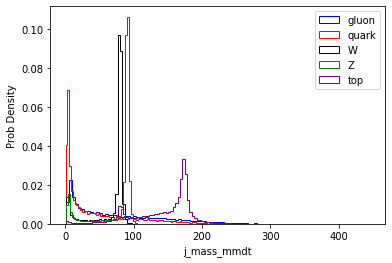

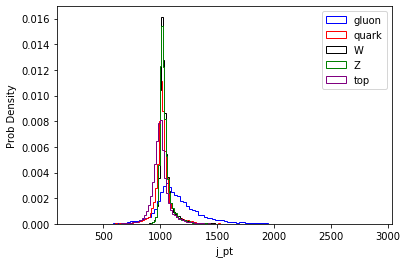

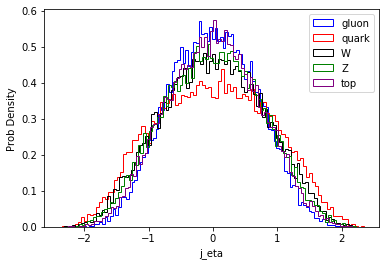

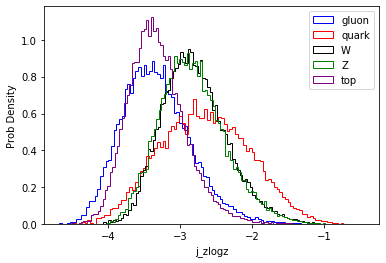

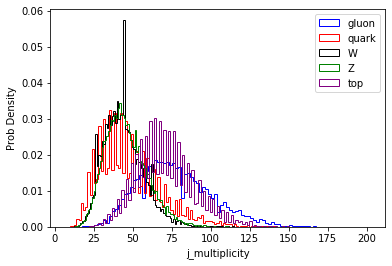

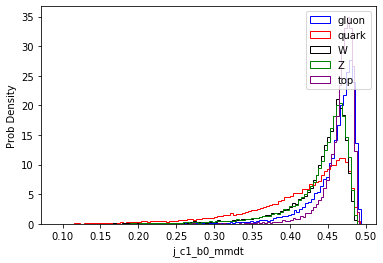

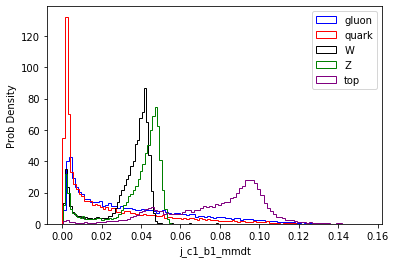

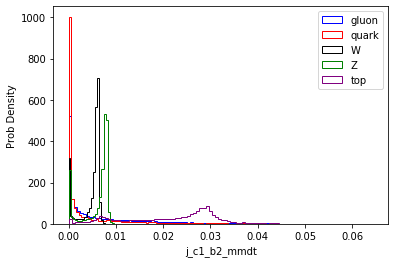

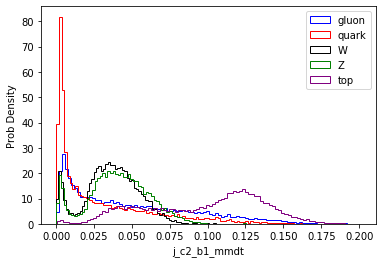

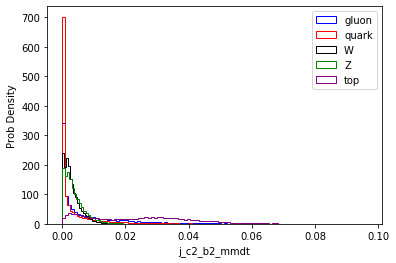

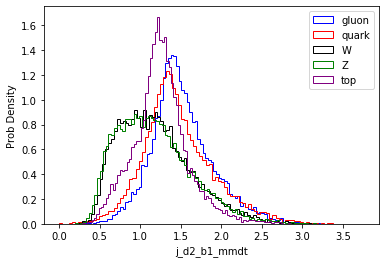

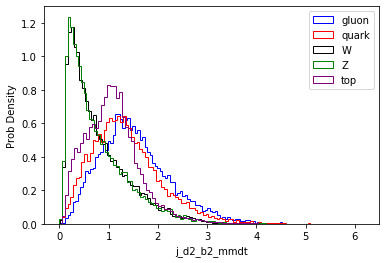

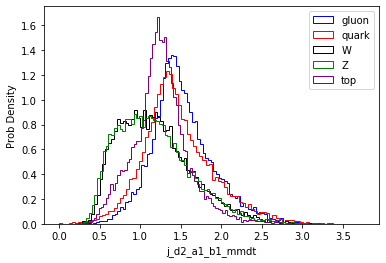

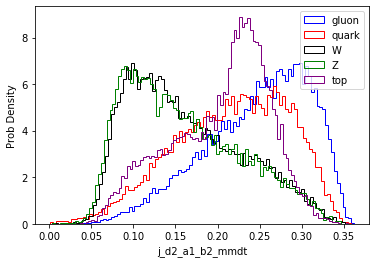

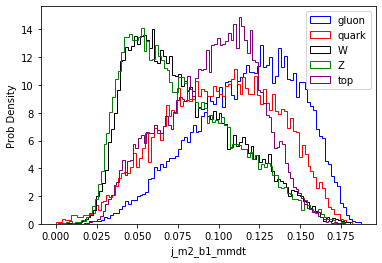

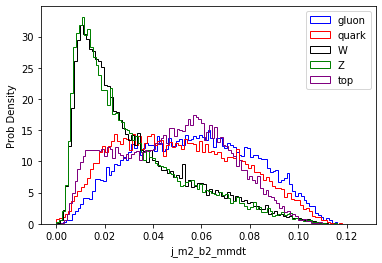

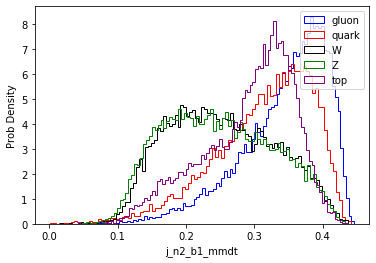

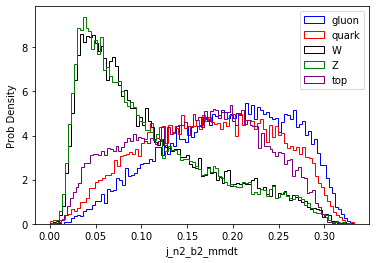

In [34]:
for y in features:
    plot_1D(y)


# Task3:low level features

In [35]:
low_feature = ['j1_px', 'j1_py', 'j1_pz', 'j1_e', 'j1_pdgid', 
            'j1_erel', 'j1_pt', 'j1_ptrel', 'j1_eta', 'j1_etarel', 
             'j1_etarot', 'j1_phi', 'j1_phirel', 'j1_phirot', 
            'j1_deltaR', 'j1_costheta', 'j1_costhetarel', 
             'j1_e1mcosthetarel']
low_feat_df = pd.DataFrame(treeArray, columns = low_feature + labels)

In [36]:
def plot_1D_low(feature):
    
    features = [feature] + labels
    features_df = pd.DataFrame(treeArray,columns = features)
    val = features_df[features].values

    q = []
    g = []
    w = []
    z = []
    t = []

    for x in val:
        if x[1] == 1:
            g.append(x[0])
        if x[2] == 1:
            q.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            t.append(x[0])
    plt.hist(g,100,histtype='step',density = True,log=True, label = 'gluon',color = 'blue')
    plt.hist(q,100,histtype='step',density = True,log=True, label = 'quark',color = 'red')
    plt.hist(w,100,histtype='step',density = True,log=True, label = 'W',color = 'black')
    plt.hist(z,100,histtype='step',density = True,log=True, label = 'Z',color = 'green')
    plt.hist(t,100,histtype='step',density = True,log=True, label = 'top',color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob Density')
    plt.legend()
    plt.show()

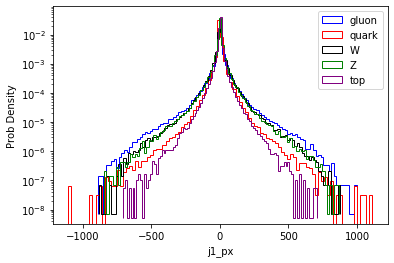

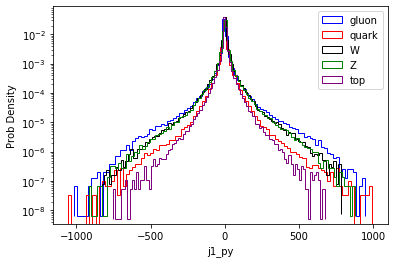

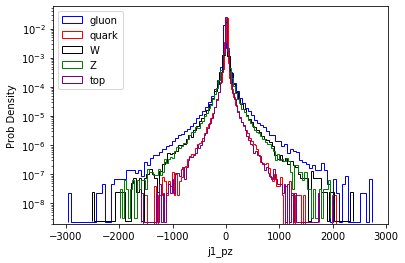

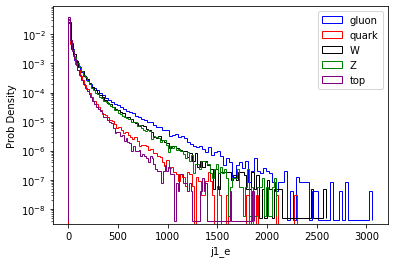

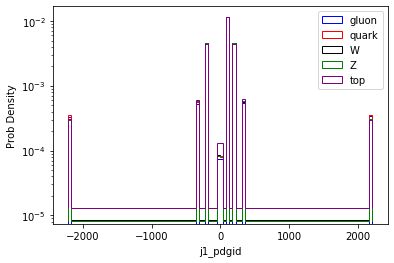

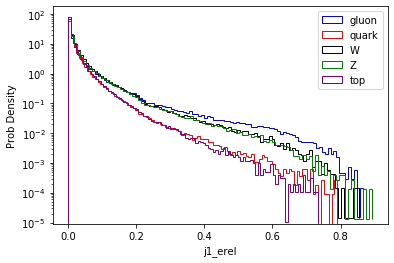

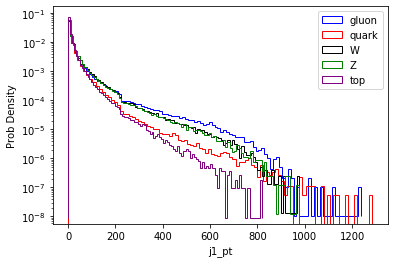

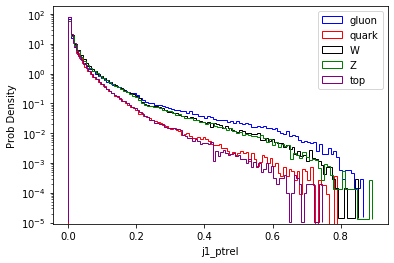

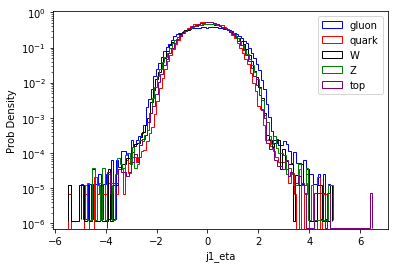

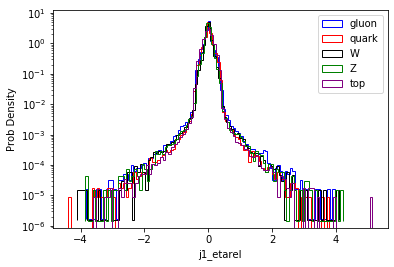

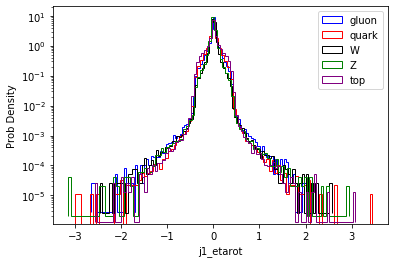

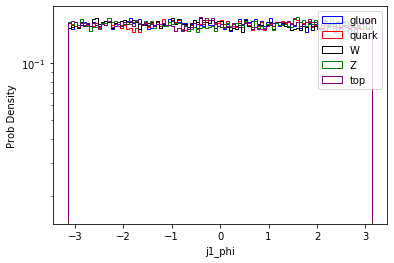

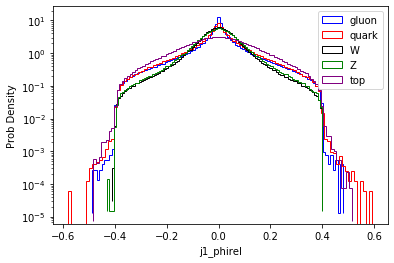

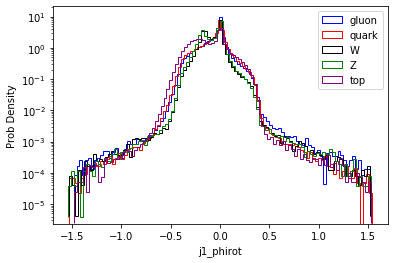

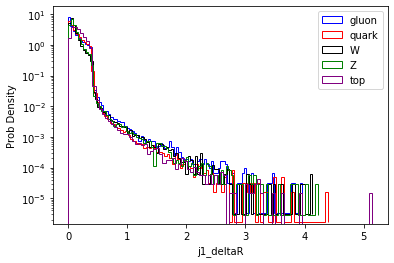

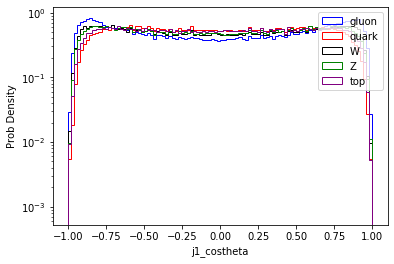

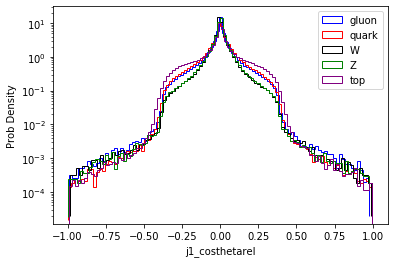

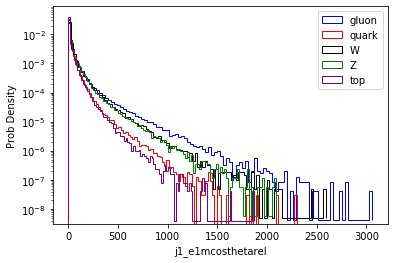

In [37]:
for i in low_feature:
    plot_1D_low(i)